In [47]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset


In [48]:
class RNNCell(nn.Module):
    
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(RNNCell, self).__init__()
        self.Wx = torch.randn(hiddenSize, inputSize) # input weights
        self.Wh = torch.randn(hiddenSize, hiddenSize) # hidden weights
        self.Wy = torch.randn(outputSize,recurhiddenSizerentSize) # output weights
        self.h = torch.zeros(hiddenSize,1) # initial hidden state
        self.bh = torch.zeros(hiddenSize,1) # hidden state bias
        self.by = torch.zeros(outputSize,1) # output bias

    def forward(self, x):
        self.h = torch.tanh(self.bh + torch.matmul(self.Wx, x) + torch.matmul(self.Wh,self.h))
        output = nn.Softmax(self.by + torch.matmul(self.Wy,self.h))
        
        return output, self.h

Text(0.5, 0, 'x')

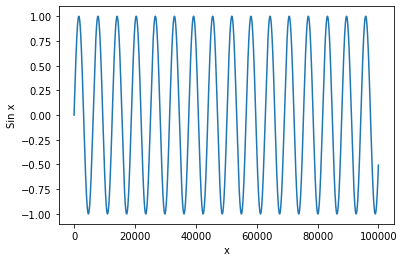

In [49]:
X = torch.sin(torch.linspace(0,100,100000))
plt.plot(X)
plt.ylabel('Sin x')
plt.xlabel('x')

In [50]:

class RNNData(Dataset):
    def __init__(self, X, sequenceLength):
        'Initialization'
        self.X = X
        self.sequenceLength = sequenceLength

    def __len__(self):
        'Denotes the total number of samples'
        return int(torch.floor(torch.tensor(len(self.X)/self.sequenceLength)))
    
    def __getitem__(self, index):
        sequence = self.X[index:index+self.sequenceLength]
        y = self.X[index+self.sequenceLength+1]
        return sequence, y

In [51]:
#hyperparameters
batchSize = 100 
sequenceLength = 50
numLayers = 1
hiddenSize = 4
learningRate = 0.01
epochs = 100

In [52]:
data = RNNData(X,sequenceLength)
dataLoader = DataLoader(data, batch_size=batchSize, shuffle=True)
for x,y in dataLoader:
    print(x)
    print(y)
    break

tensor([[0.1977, 0.1987, 0.1997,  ..., 0.2435, 0.2445, 0.2455],
        [0.4059, 0.4069, 0.4078,  ..., 0.4484, 0.4493, 0.4502],
        [0.8912, 0.8917, 0.8921,  ..., 0.9115, 0.9119, 0.9124],
        ...,
        [0.8117, 0.8123, 0.8128,  ..., 0.8382, 0.8388, 0.8393],
        [0.9963, 0.9964, 0.9965,  ..., 0.9992, 0.9993, 0.9993],
        [0.3977, 0.3986, 0.3995,  ..., 0.4404, 0.4413, 0.4422]])
tensor([0.2474, 0.4520, 0.9132, 0.9972, 0.4132, 0.9986, 0.2580, 0.6272, 0.7695,
        0.9936, 0.9777, 0.9785, 0.9365, 0.8152, 0.9614, 0.7420, 0.9471, 0.9474,
        0.9379, 0.9659, 0.5778, 0.9697, 0.8966, 0.9992, 0.9080, 0.7901, 0.8930,
        0.3485, 0.8537, 0.3012, 0.9874, 0.8338, 0.8894, 0.5819, 0.6020, 0.9029,
        0.9625, 0.8928, 0.9428, 0.9291, 0.9977, 0.8644, 0.3728, 0.6233, 0.1018,
        0.5346, 0.9990, 0.5505, 0.9744, 0.9530, 0.9150, 0.7413, 0.9313, 0.5932,
        0.9987, 0.9499, 0.0580, 0.9286, 0.1425, 0.9862, 0.9980, 0.9687, 0.2026,
        0.9423, 0.7004, 0.6846, 0.9855, 0.

In [53]:
# create our RNN based network with an RNN followed by a linear layer
class RNN(nn.Module):
    def __init__(self, inputSize, hiddenSize, numLayers):
        super().__init__()
        self.RNN = nn.RNN(input_size=inputSize, 
                          hidden_size=hiddenSize, 
                          num_layers=numLayers, 
                          nonlinearity='tanh', 
                          batch_first=True) #inputs and outputs are  (batch, seq, feature)
        self.linear = nn.Linear(hiddenSize,1)
        
    def forward(self,x,hState):
        x, h = self.RNN(x,hState)
        out = self.linear(x[:,-1,:]) # gets last output
        return out

In [54]:
# create our network instance, pick loss function and optimizer
model = RNN(1,hiddenSize,numLayers)
lossFn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [55]:
# check output to see if everything is setup correctly
ytest = model(torch.randn(batchSize,sequenceLength,1),torch.zeros([numLayers, batchSize, hiddenSize]))
ytest.shape

torch.Size([100, 1])

11.319549560546875
1.7751704454421997
1.4014699459075928
1.1168690919876099
0.5675828456878662
0.05716589093208313
0.010280625894665718
0.004087743349373341
0.0029274208936840296
0.0025021100882440805
0.002253422513604164
0.002016317332163453
0.0018425789894536138
0.0017580073326826096
0.0015311933821067214
0.0013432155828922987
0.001226308522745967
0.0011239354498684406
0.0010009920224547386
0.0009049549116753042
0.0008012366015464067
0.0007353670080192387
0.0006402007420547307
0.0005788293201476336
0.0005184737383387983
0.0004636308876797557
0.00041253535891883075
0.00036798190558329225
0.00034769228659570217
0.0002972030488308519
0.0002639765734784305
0.00022841084864921868
0.00021119693701621145
0.00018246164836455137
0.00017494821804575622
0.0001459053164580837
0.00012809678446501493
0.00011152001388836652
0.00010181981633650139
9.421376307727769e-05
8.516746311215684e-05
9.344099089503288e-05
7.571556488983333e-05
6.939681770745665e-05
6.255778134800494e-05
6.651831790804863e-05


Text(0, 0.5, 'Loss')

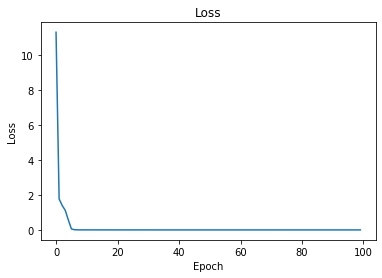

In [56]:
# train the model!
model.train()
lossHistory = []
for epoch in range(epochs):
    lossTotal = 0
    for x,y in dataLoader:
        hState = torch.zeros([numLayers, batchSize, hiddenSize])
        yhat= model(x.reshape([batchSize,sequenceLength, 1]),hState)
        
        loss = lossFn(yhat.view(-1),y)
        
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        lossTotal +=loss
    lossHistory.append(lossTotal)
    print(lossTotal.item())
        
plt.plot(lossHistory)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [57]:
print(X[:sequenceLength])
print(X[sequenceLength+1])

tensor([0.0000, 0.0010, 0.0020, 0.0030, 0.0040, 0.0050, 0.0060, 0.0070, 0.0080,
        0.0090, 0.0100, 0.0110, 0.0120, 0.0130, 0.0140, 0.0150, 0.0160, 0.0170,
        0.0180, 0.0190, 0.0200, 0.0210, 0.0220, 0.0230, 0.0240, 0.0250, 0.0260,
        0.0270, 0.0280, 0.0290, 0.0300, 0.0310, 0.0320, 0.0330, 0.0340, 0.0350,
        0.0360, 0.0370, 0.0380, 0.0390, 0.0400, 0.0410, 0.0420, 0.0430, 0.0440,
        0.0450, 0.0460, 0.0470, 0.0480, 0.0490])
tensor(0.0510)


In [58]:
model.eval()
model(X[:sequenceLength].reshape(1,sequenceLength,1),torch.zeros([numLayers, 1, hiddenSize]))

tensor([[0.0509]], grad_fn=<AddmmBackward>)